# Model evaluation

## Initialize

### Initialize directories

In [44]:
# Initialize main directory on the server
DIRECTORY = "/binf-isilon/alab/students/stefano/thesis_project/"                        # General directory

### Model and scaler

# Best performing model
FILENAME_MODEL = "pos_neg_shift_timepoint_0to2_all_merged_subtnorm"                     # Model filename (final pred)
MODEL_PATH = f"{DIRECTORY}Models/pos_neg_shift_timepoint_0to2_all_merged_subtnorm/"     # Model path (save and load)      

### Import module

In [3]:
# Import 
import main_script_thesis_server

### Load data

#### Train

In [ ]:
## Train

# Path
IN_PATH = "Data/ML_input/timepoint_0to2_all_pos_neg_shift/subtnorm/"                                 # Path input data                          
FILENAME = "pos_neg_shift_timepoint_0to2_all_merged_subtnorm"                                        # Data filenam

# Load data
X_TRAIN = pd.read_csv(f"{DIRECTORY}{IN_PATH}/profiles_{FILENAME}_train.csv").drop("label", axis = 1) 
metadata_train = pd.read_csv(f"{DIRECTORY}{IN_PATH}/metadata_{FILENAME}_train.csv")
y_TRAIN = metadata_train["label"]

print(X_TRAIN.shape)
print(y_TRAIN.shape)

#### Test HeLa (HeLa directory contain all results)

In [ ]:
## Test HeLa (HeLa directory contain all results)

# Path
IN_PATH = "Data/ML_input/hela/"                                                   # Path input data     
IN_PATH_ML_RESULT = f"{DIRECTORY}Data/ML_output/predictions/hela/"                # Load results to evaluate
OUT_PATH_ML_RESULT = f"{DIRECTORY}Data/ML_output/predictions/hela/"               # Store results
OUT_PATH = f"{DIRECTORY}Plots/hela/Both_experiments/"                             # Store plots, scaler and model                     
FILENAME = "hela_Rrp40_merged_subtnorm"                                           # Data filenam        
#FILENAME = "hela_Both_experiments_merged_subtnorm"                           
#FILENAME = "hela_EGFP_merged_subtnorm"                                        

# Load data
X_TEST = pd.read_csv(f"{DIRECTORY}{IN_PATH}/profiles_{FILENAME}_test.csv").drop("label", axis = 1) 
metadata_test = pd.read_csv(f"{DIRECTORY}{IN_PATH}/metadata_{FILENAME}_test.csv")
y_TEST = metadata_test["label"]

print(X_TEST.shape)
print(y_TEST.shape)

## Performance evaluation

#### Initialize

In [266]:
# Test sets
FILENAME = "final_evaluation_hela_gm_dnase" 
FILENAME_1 = "hela_Rrp40_merged_subtnorm_j_thresholded"
FILENAME_2 = "hela_EGFP_merged_subtnorm_j_thresholded"
FILENAME_3 = "hela_Both_experiments_merged_subtnorm_j_thresholded"
FILENAME_0to2 = "pos_neg_shift_timepoint_0to2_all_merged_subtnorm_j_thresholded"
FILENAME_6 = "pos_neg_shift_timepoint_6_merged_subtnorm_j_thresholded"
FILENAME_6_DNASE = "meuleman_timepoint_6_merged_subtnorm_j_thresholded"

# Train
lgb_cv_train_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/lgbm_7folds_cv_train_output_{FILENAME_0to2}.csv")
cnn_cv_train_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/cnn_7folds_cv_train_output_{FILENAME_0to2}.csv")
# Validation
lgb_cv_val_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/lgbm_7folds_cv_val_output_{FILENAME_0to2}.csv")
cnn_cv_val_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/cnn_7folds_cv_val_output_{FILENAME_0to2}.csv")
# Soft test
lgb_soft_test_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/lgbm_7folds_test_output_{FILENAME_0to2}.csv")
cnn_soft_test_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/cnn_7folds_test_output_{FILENAME_0to2}.csv")
# Hard test
lgb_hard_test_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/lgbm_7folds_hard_test_output_{FILENAME_6}.csv")
cnn_hard_test_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/cnn_7folds_hard_test_output_{FILENAME_6}.csv")
# Hard test DNase
lgb_hard_test_dnase_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/lgbm_7folds_test_output_{FILENAME_6_DNASE}.csv")
cnn_hard_test_dnase_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/cnn_7folds_test_output_{FILENAME_6_DNASE}.csv")
# Hela  
lgb_hela_rrp40_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/lgbm_7folds_test_output_{FILENAME_1}.csv")
cnn_hela_rrp40_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/cnn_7folds_test_output_{FILENAME_1}.csv")
lgb_hela_egfp_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/lgbm_7folds_test_output_{FILENAME_2}.csv")
cnn_hela_egfp_output = pd.read_csv(f"{IN_PATH_ML_RESULT}thresholded/cnn_7folds_test_output_{FILENAME_2}.csv")

# Groups
pred_lgb_all = lgb_cv_train_output, lgb_cv_val_output, lgb_hard_test_output, lgb_hard_test_dnase_output, lgb_hela_egfp_output, lgb_hela_rrp40_output
pred_cnn_all = cnn_cv_train_output, cnn_cv_val_output, cnn_hard_test_output, cnn_hard_test_dnase_output, cnn_hela_egfp_output, cnn_hela_rrp40_output
pred_gm = lgb_cv_train_output, cnn_cv_train_output, lgb_cv_val_output, cnn_cv_val_output, lgb_hard_test_output, cnn_hard_test_output, lgb_hard_test_dnase_output, cnn_hard_test_dnase_output
pred_tests = lgb_hard_test_output, cnn_hard_test_output, lgb_hard_test_dnase_output, cnn_hard_test_dnase_output, lgb_hela_egfp_output, cnn_hela_egfp_output, lgb_hela_rrp40_output, cnn_hela_rrp40_output

# Names
names_all = "Train (GM, ATAC)", "Val (GM, ATAC)", "Test (GM, ATAC)", "Test (GM, DNase)", "Test (HeLa, DNase)", "Test (HeLa Rrp40, DNase)" 

names_gm = "LGBM Train (GM, ATAC)", "CNN Train (GM, ATAC)", "LGBM Val (GM, ATAC)", "CNN Val (GM, ATAC)", "LGBM Test (GM, ATAC)", "CNN Test (GM, ATAC)", "LGBM Test (GM, DNase)", "CNN Test (GM, DNase)"
names_tests = "LGBM GM (ATAC)", "CNN GM (ATAC)", "LGBM GM (DNase)", "CNN GM (DNase)", "LGBM HeLa (DNase)", "CNN HeLa (DNase)", "LGBM HeLa Rrp4 (DNase)", "CNN HeLa Rrp40 (DNase)"
names_tests = "LGBM Test (GM, ATAC)", "CNN Test (GM, ATAC)", "LGBM Test (GM, DNase)", "CNN Test (GM, DNase)", "LGBM Test (HeLa, DNase)", "CNN Test (HeLa, DNase)", "LGBM Test (HeLa Rrp4, DNase)", "CNN Test (HeLa Rrp4, DNase)"

names = "LGBM", "CNN"
names_all_lgb = [f"LGBM {name}" for name in names_all]
names_all_cnn = [f"CNN {name}" for name in names_all]

#### Summary heatmap

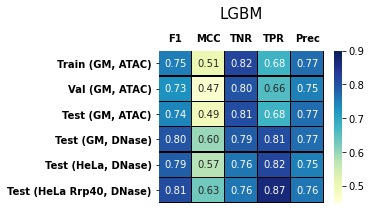

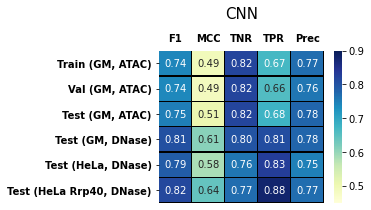

In [6]:
# Summary heatmap
eval_heatmap(pred_lgb_all, index=names_all, title="LGBM", filename="lgbm_meuleman", save=True, vmin=0.45, vmax=0.9, figsize=(3.7, 2.8))
eval_heatmap(pred_cnn_all, index=names_all, title="CNN", filename="cnn_meuleman", save=True, vmin=0.45, vmax=0.9, figsize=(3.7, 2.8))

#### Classification report (substituted by the heatmap)

In [74]:
# # Plot classification report
# for i in range(len(names_subtnorm)):
#   plot_clf_report(train_output_lst_subtnorm[i], test_output_lst_subtnorm[i], names_subtnorm[i], save=True)

#### Barplot accuracy, F1, MCC (substituted by the heatmap)

In [75]:
# # Plot accuracy, F1, MCC (substituted by the heatmap)
# plot_metrics(train_output_lst_subtnorm, test_output_lst_subtnorm, names_subtnorm, filename="all_subtnorm",
#              bbox_to_anchor=(1.2, 0.6), annotation_size=10, save=True)    

#### ROC

<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=col

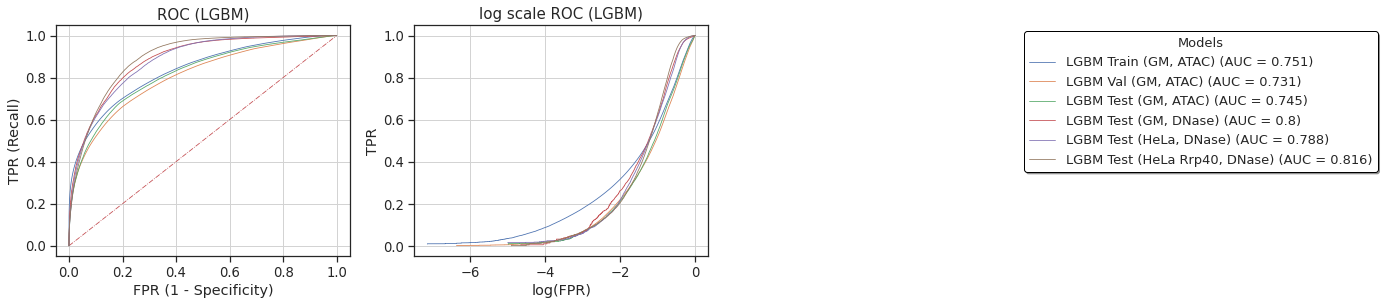

<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=col

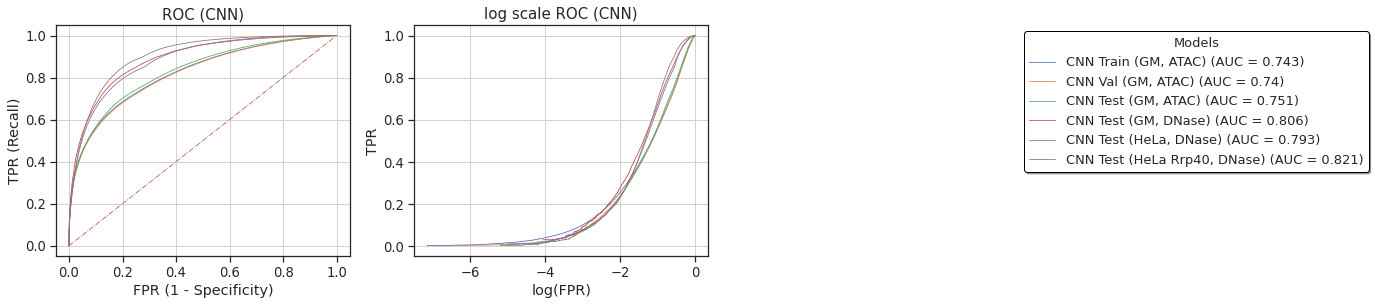

<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=col

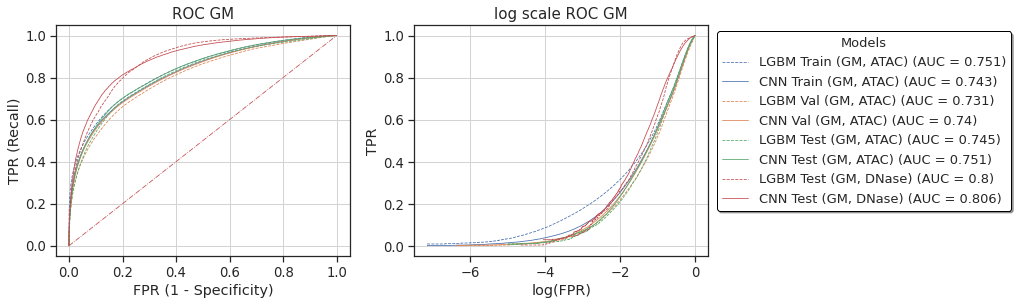

<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=colors[i], lw=0.8) # lw=0.9
<ipython-input-57-e8a8673e4ba0>:36: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(fpr), tpr, ls, label=f"{names[i]} (AUC = {auc:.3})", zorder=3, c=col

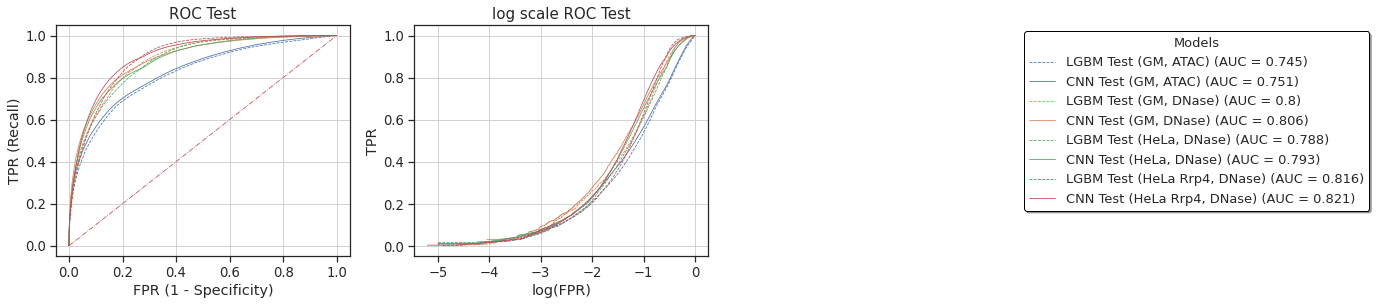

In [130]:
## ROC and log ROC

# LGBM
plot_ROC(pred_lgb_all, names_all_lgb, plot_name="(LGBM)", save=True, filename="lgb")

# CNN
plot_ROC(pred_cnn_all, names_all_cnn, plot_name="(CNN)", save=True, filename="cnn")

# All GM
plot_ROC(pred_gm, names_gm, plot_name="(GM12878)", save=True, filename="all")

# All tests
plot_ROC(pred_tests, names_tests, plot_name="(Test sets)", save=True, filename="all")

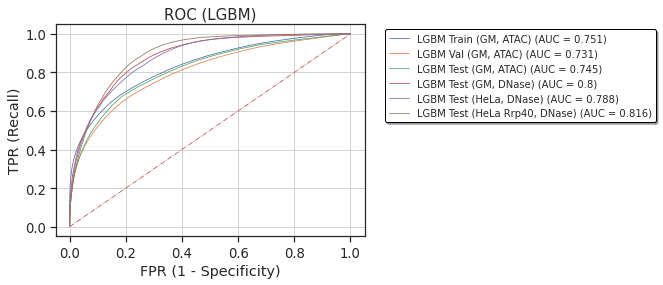

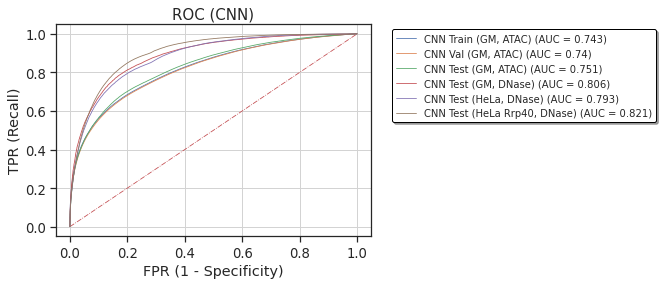

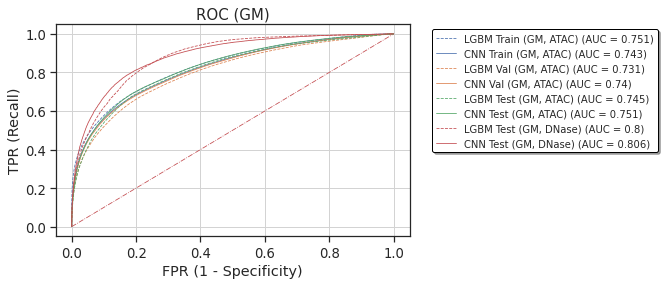

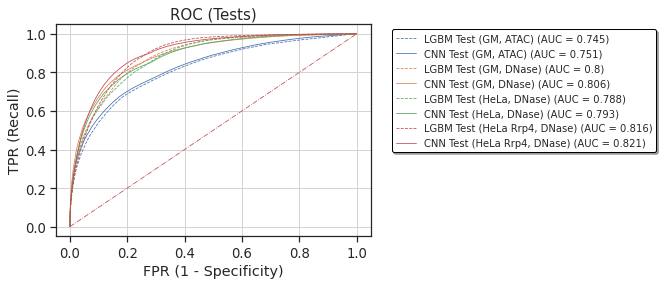

In [131]:
## ROC only

# LGBM
plot_ROC_only(pred_lgb_all, names_all_lgb, plot_name="(LGBM)", save=True, filename="lgb")

# CNN
plot_ROC_only(pred_cnn_all, names_all_cnn, plot_name="(CNN)", save=True, filename="cnn")

# All GM
plot_ROC_only(pred_gm, names_gm, plot_name="(GM12878)", save=True, filename="all")

# All tests
plot_ROC_only(pred_tests, names_tests, plot_name="(Test sets)", save=True, filename="all")

#### Precision recall curve
Precision: What proportion of positive identifications was actually correct? TP / (TP + FP)  
Recall: What proportion of actual positives was identified correctly? TP / (TP + FN)

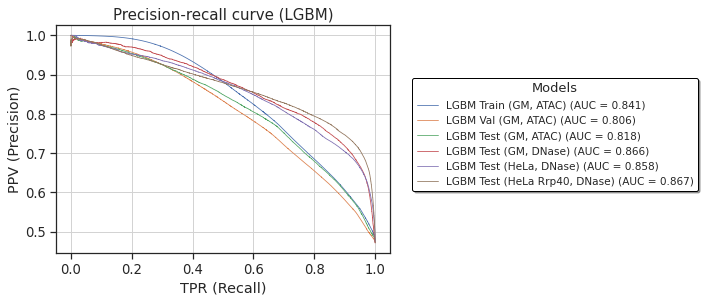

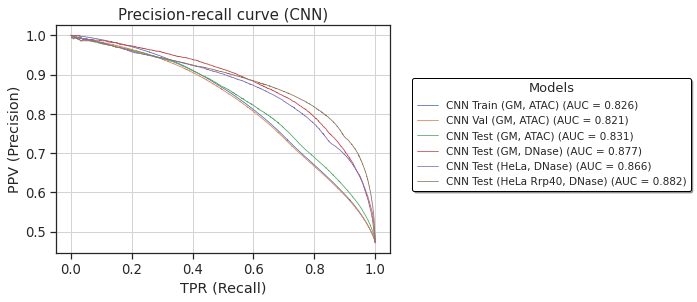

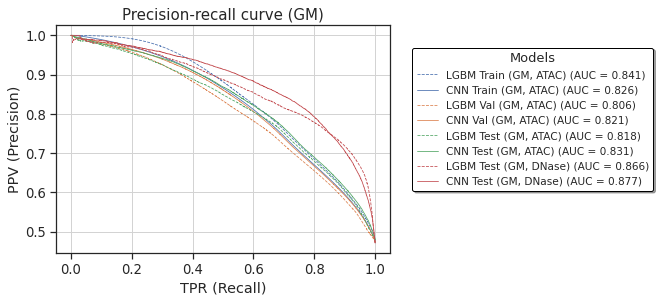

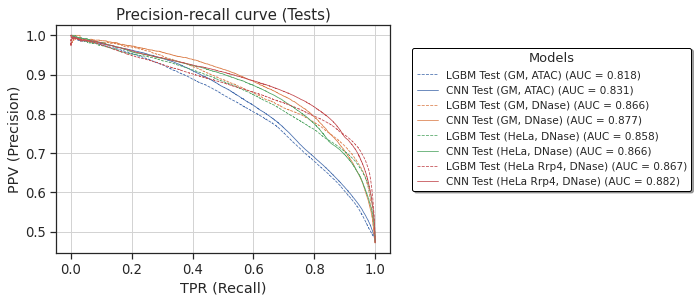

In [132]:
## Precision-recall curve

# LGBM
plot_precision_recall_curve(pred_lgb_all, names_all_lgb, plot_name="(LGBM)", legend_ncol=1,
                            save=True, filename="lgb", legend_outside=True, bbox_to_anchor=(1.05, 0.25))


# CNN
plot_precision_recall_curve(pred_cnn_all, names_all_cnn, plot_name="(CNN)", legend_ncol=1,
                            save=True, filename="cnn", legend_outside=True, bbox_to_anchor=(1.05, 0.25))

# All GM
plot_precision_recall_curve(pred_gm, names_gm, plot_name="(GM12878)", legend_ncol=1,
                            save=True, filename="all", legend_outside=True, bbox_to_anchor=(1.05, 0.25))

# All tests
plot_precision_recall_curve(pred_tests, names_tests, plot_name="(Test sets)", legend_ncol=1,
                            save=True, filename="all", legend_outside=True, bbox_to_anchor=(1.05, 0.25))

#### Confusion matrix

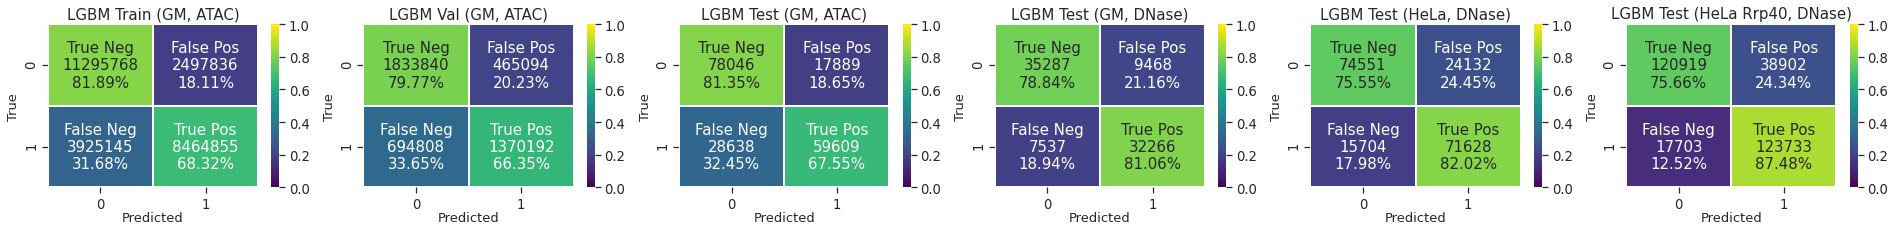

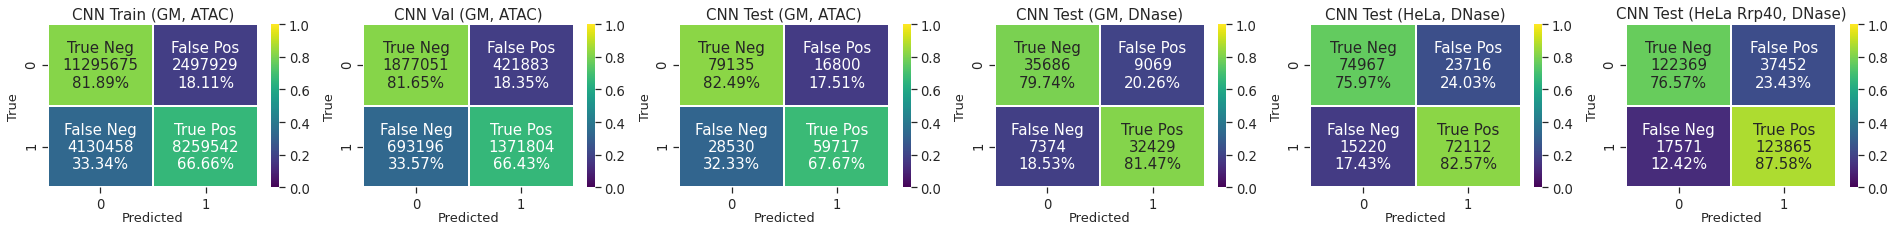

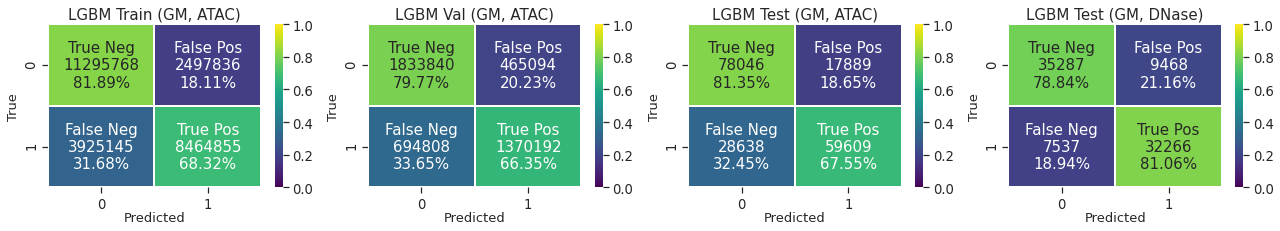

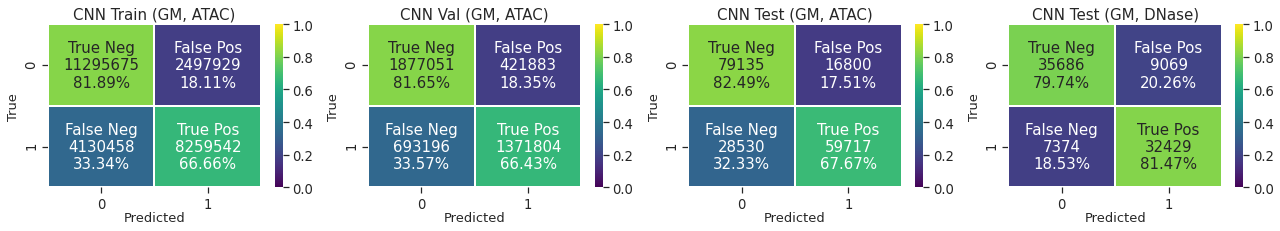

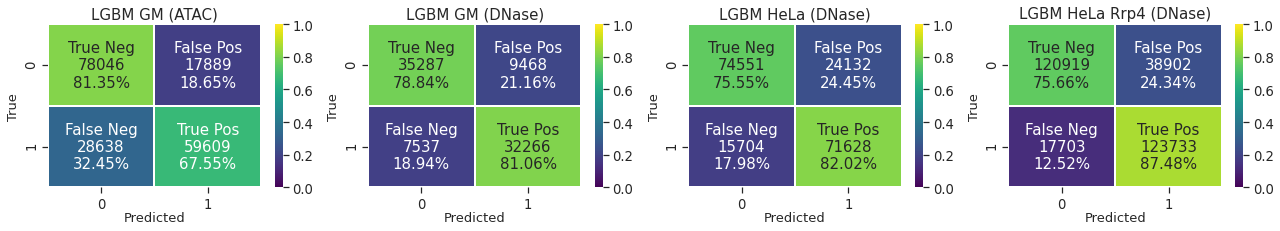

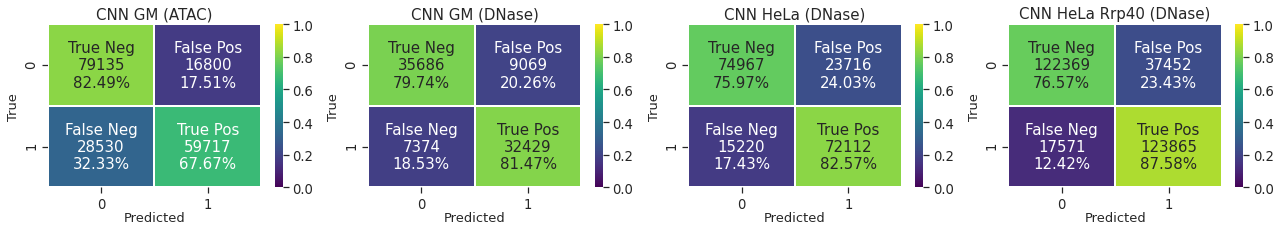

In [12]:
## Confusion matrix

# LGBM All
plot_confusion_matrix(ml_output_lst=pred_lgb_all, 
                      names=names_all_lgb, 
                      figsize=(33, 3), save=True, filename="lgb_all")
# CNN All 
plot_confusion_matrix(ml_output_lst=pred_cnn_all, 
                      names=names_all_cnn, 
                      figsize=(33, 3), save=True, filename="cnn_all")
# LGBM GM
plot_confusion_matrix(ml_output_lst=(lgb_cv_train_output, lgb_cv_val_output, 
                                     lgb_hard_test_output, lgb_hard_test_dnase_output), 
                      names=("LGBM Train (GM, ATAC)", "LGBM Val (GM, ATAC)", 
                             "LGBM Test (GM, ATAC)", "LGBM Test (GM, DNase)"), 
                      figsize=(22, 3), save=True, filename="lgb_gm")

# CNN GM
plot_confusion_matrix(ml_output_lst=(cnn_cv_train_output, cnn_cv_val_output, 
                                     cnn_hard_test_output, cnn_hard_test_dnase_output), 
                      names=("CNN Train (GM, ATAC)", "CNN Val (GM, ATAC)", 
                             "CNN Test (GM, ATAC)", "CNN Test (GM, DNase)"), 
                      figsize=(22, 3), save=True, filename="cnn_gm")


# LGBM Tests
plot_confusion_matrix(ml_output_lst=(lgb_hard_test_output, lgb_hard_test_dnase_output, 
                                     lgb_hela_egfp_output, lgb_hela_rrp40_output), 
                      names=("LGBM GM (ATAC)", "LGBM GM (DNase)", 
                             "LGBM HeLa (DNase)", "LGBM HeLa Rrp4 (DNase)"),
                      figsize=(22, 3), save=True, filename="lgb_tests")

# CNN Tests
plot_confusion_matrix(ml_output_lst=(cnn_hard_test_output, cnn_hard_test_dnase_output, 
                                     cnn_hela_egfp_output, cnn_hela_rrp40_output), 
                      names=("CNN GM (ATAC)", "CNN GM (DNase)", 
                             "CNN HeLa (DNase)", "CNN HeLa Rrp40 (DNase)"), 
                      figsize=(22, 3), save=True, filename="cnn_tests")

#### Barplot of TNR and TPR (substituted by the heatmap)

In [77]:
# # Barplot of TNR and TPR (substituted by the heatmap)
# plot_tp_tn(train_output_lst_subtnorm, test_output_lst_subtnorm, names_subtnorm, bbox_to_anchor=(1, 0.6), 
#            annotation_size=10, digit=2, save=True, filename="all")    

### PCA (correctly and wrongly classified samples)

#### Rrp40

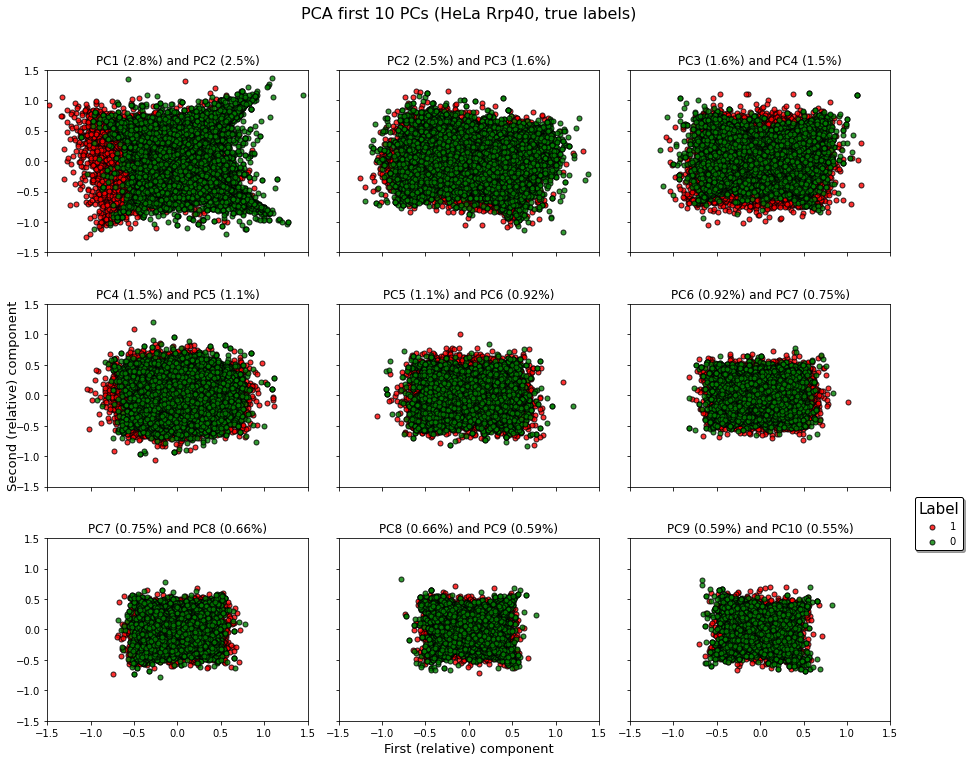

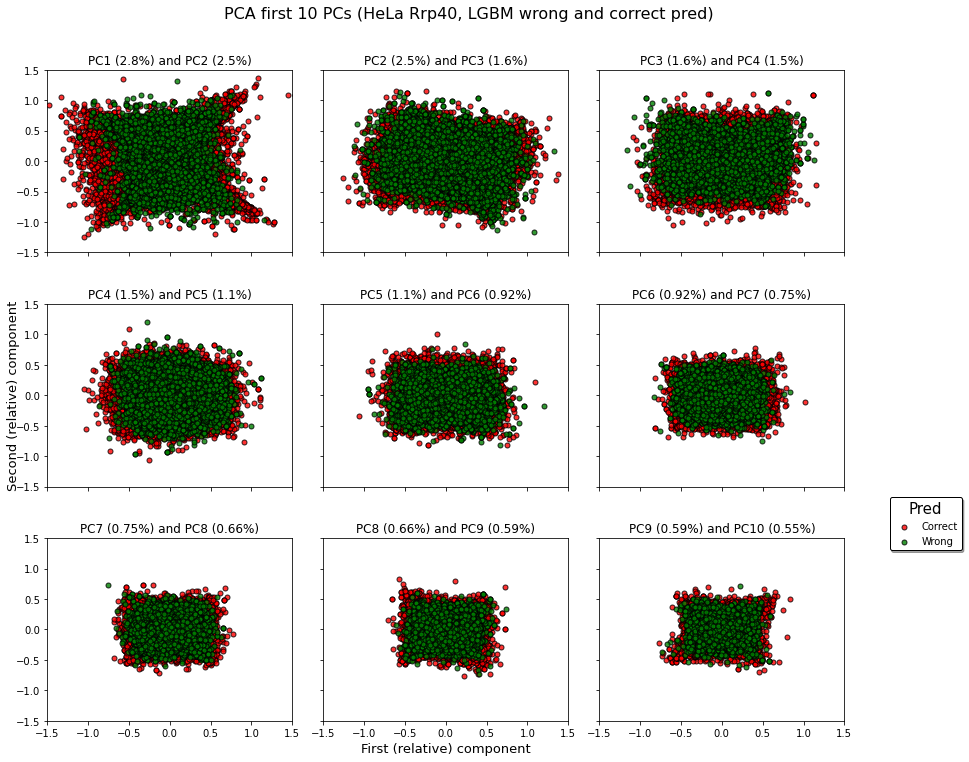

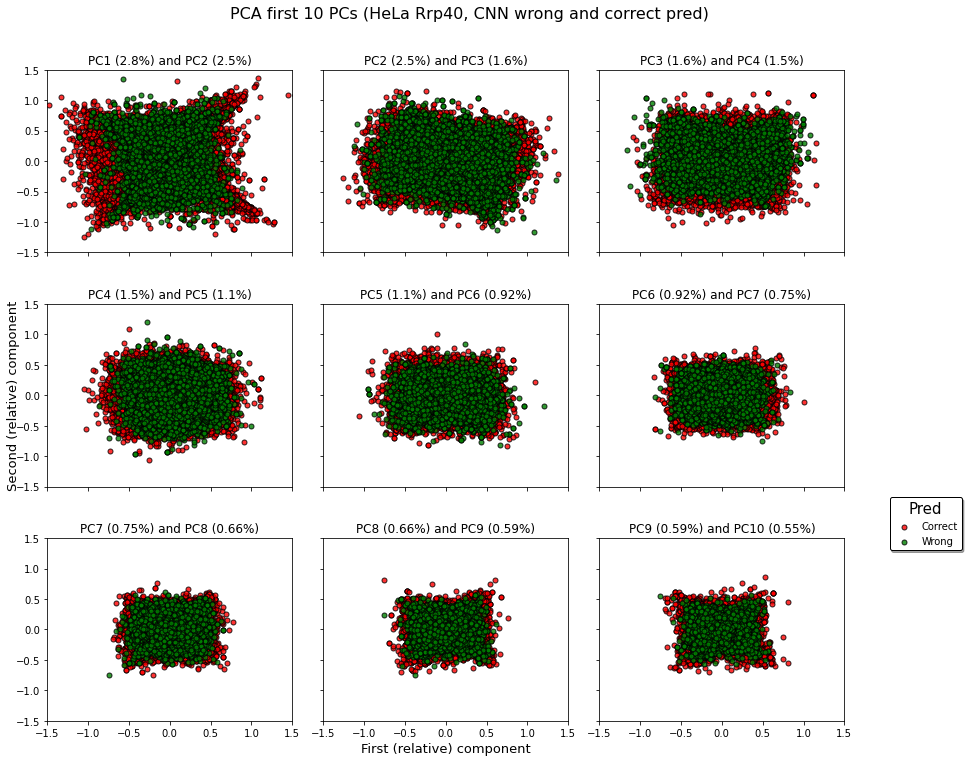

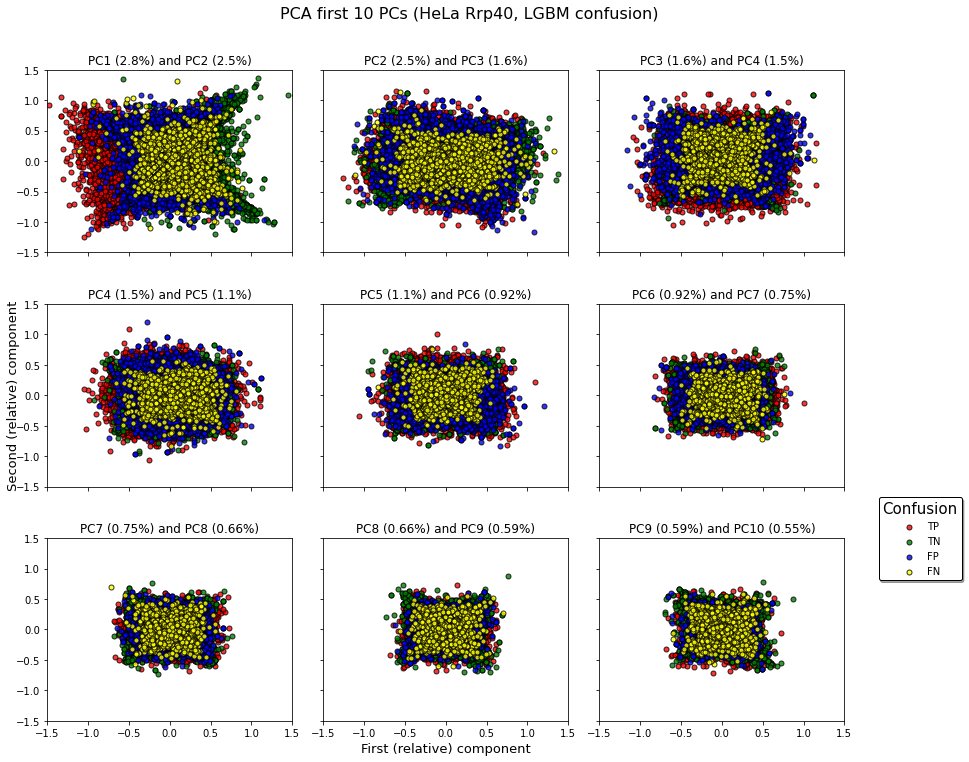

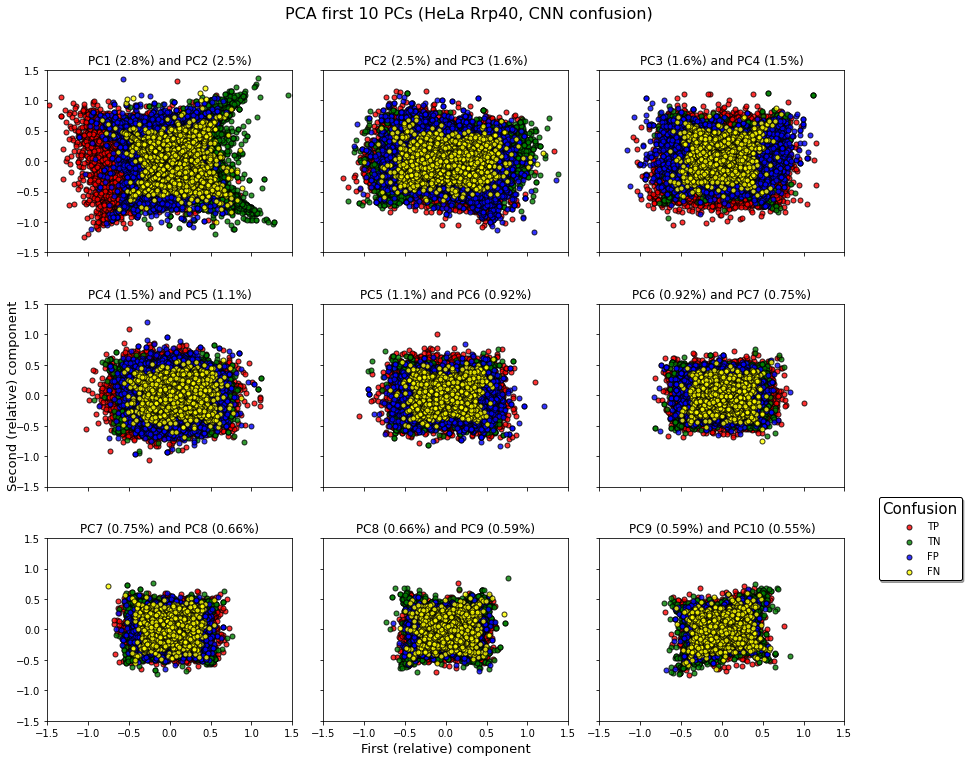

In [26]:
# PCA plot labels
multi_plot_pca(X_TEST, y_TEST, nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=[1, 0],
               legend_title="Label", filename="true_labels_rrp40_egfp", 
               title=" (HeLa Rrp40, true labels)") 

# Correct and wrong predictions
multi_plot_pca(X_TEST, lgb_hela_rrp40_output_confusion["prediction"], nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=["Correct", "Wrong"],
               legend_title="Pred", filename="lgb_correct_wrong_rrp40",
               title=" (HeLa Rrp40, LGBM wrong and correct pred)",
               legend_anchor=(1.5, 1.25))
multi_plot_pca(X_TEST, cnn_hela_rrp40_output_confusion["prediction"], nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=["Correct", "Wrong"],
               legend_title="Pred", filename="cnn_correct_wrong_rrp40",
               title=" (HeLa Rrp40, CNN wrong and correct pred)",
               legend_anchor=(1.5, 1.25))

# Confusion
multi_plot_pca(X_TEST, lgb_hela_rrp40_output_confusion["confusion"], nrows=3,
               figsize=(14,11), top=0.9, save=True, 
               targets=lgb_hela_rrp40_output_confusion["confusion"].unique(),
               legend_title="Confusion", filename="lgb_confusion_rrp40",
               title=" (HeLa Rrp40, LGBM confusion)",
               legend_anchor=(1.5, 1.25)) 
multi_plot_pca(X_TEST, cnn_hela_rrp40_output_confusion["confusion"], nrows=3,
               figsize=(14,11), top=0.9, save=True, 
               targets=cnn_hela_rrp40_output_confusion["confusion"].unique(),
               legend_title="Confusion", filename="cnn_confusion_rrp40",
               title=" (HeLa Rrp40, CNN confusion)",
               legend_anchor=(1.5, 1.25)) 

#### EGFP

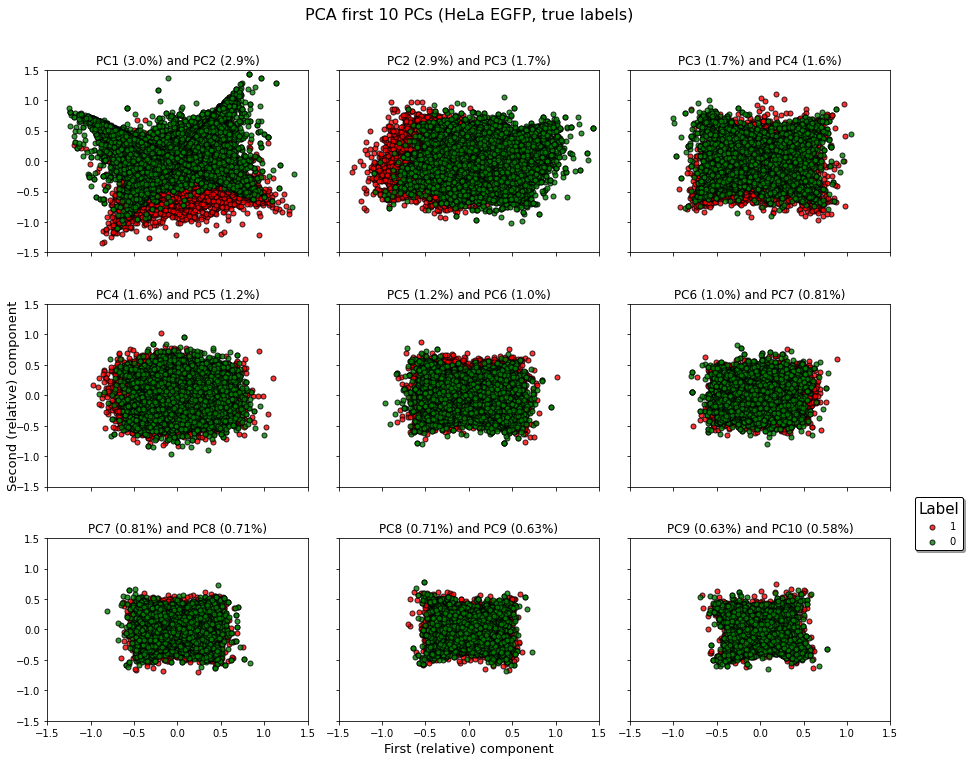

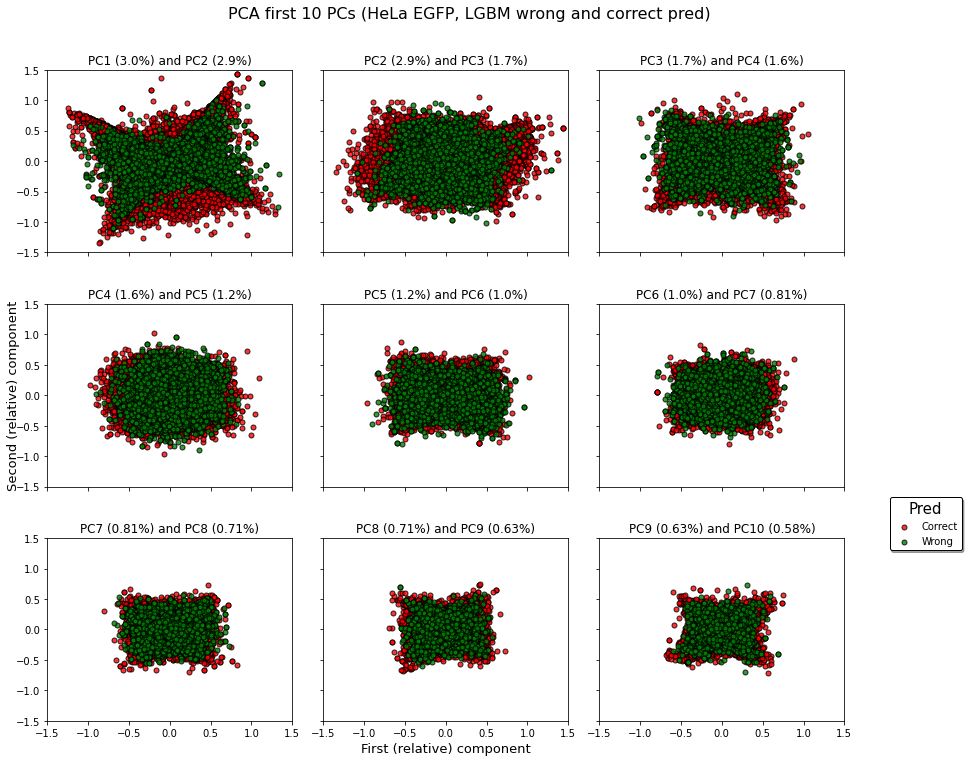

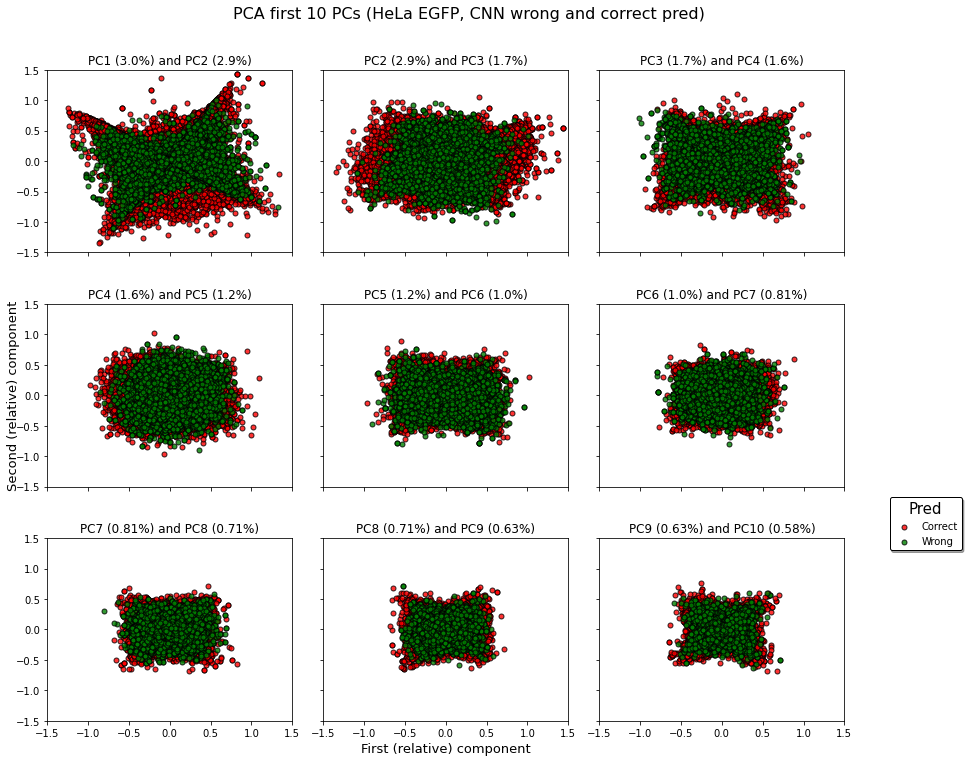

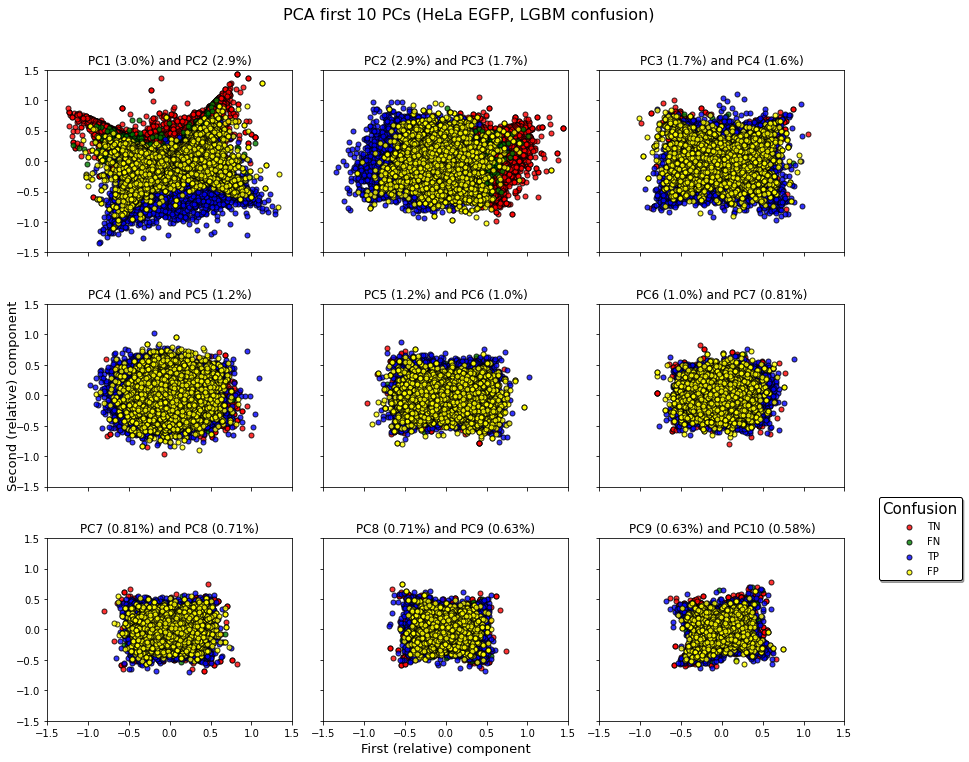

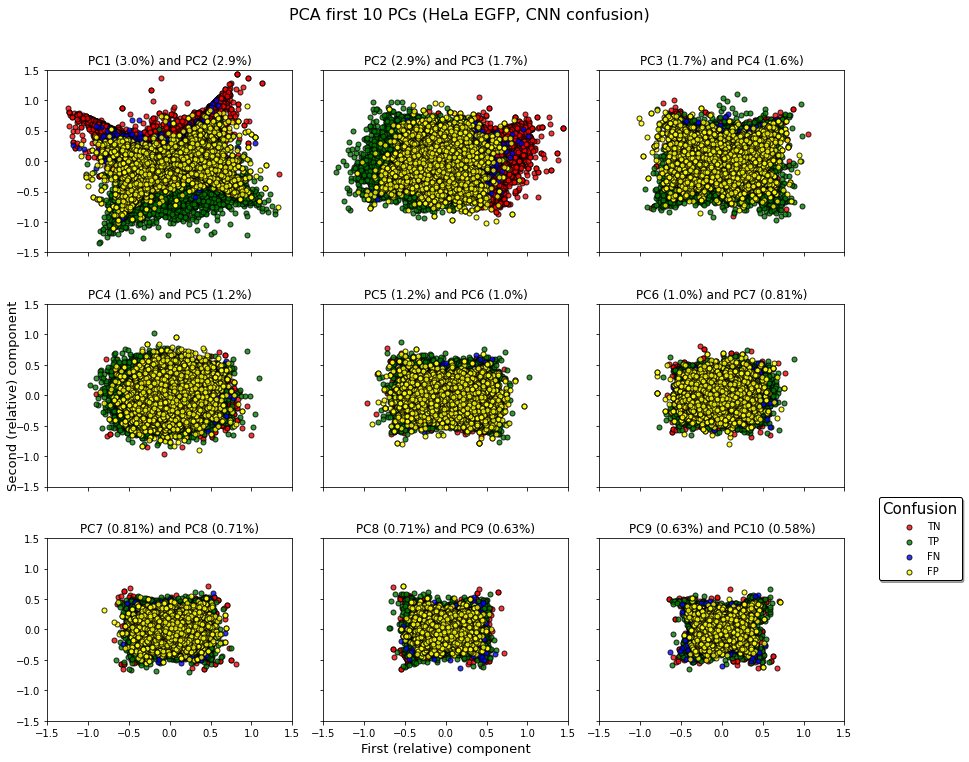

In [23]:
# PCA plot labels
multi_plot_pca(X_TEST, y_TEST, nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=[1, 0],
               legend_title="Label", filename="true_labels_egfp", 
               title=" (HeLa EGFP, true labels)") 

# PCA plot correct and wrong predictions
multi_plot_pca(X_TEST, lgb_hela_egfp_output_confusion["prediction"], nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=["Correct", "Wrong"],
               legend_title="Pred", filename="lgb_correct_wrong_egfp",
               title=" (HeLa EGFP, LGBM wrong and correct pred)",
               legend_anchor=(1.5, 1.25))
multi_plot_pca(X_TEST, cnn_hela_egfp_output_confusion["prediction"], nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=["Correct", "Wrong"],
               legend_title="Pred", filename="cnn_correct_wrong_egfp",
               title=" (HeLa EGFP, CNN wrong and correct pred)",
               legend_anchor=(1.5, 1.25))

# PCA plot confusion
multi_plot_pca(X_TEST, lgb_hela_egfp_output_confusion["confusion"], nrows=3,
               figsize=(14,11), top=0.9, save=True, 
               targets=lgb_hela_egfp_output_confusion["confusion"].unique(),
               legend_title="Confusion", filename="lgb_confusion_egfp",
               title=" (HeLa EGFP, LGBM confusion)",
               legend_anchor=(1.5, 1.25)) 
multi_plot_pca(X_TEST, cnn_hela_egfp_output_confusion["confusion"], nrows=3,
               figsize=(14,11), top=0.9, save=True, 
               targets=cnn_hela_egfp_output_confusion["confusion"].unique(),
               legend_title="Confusion", filename="cnn_confusion_egfp",
               title=" (HeLa EGFP, CNN confusion)",
               legend_anchor=(1.5, 1.25)) 

#### HeLa both

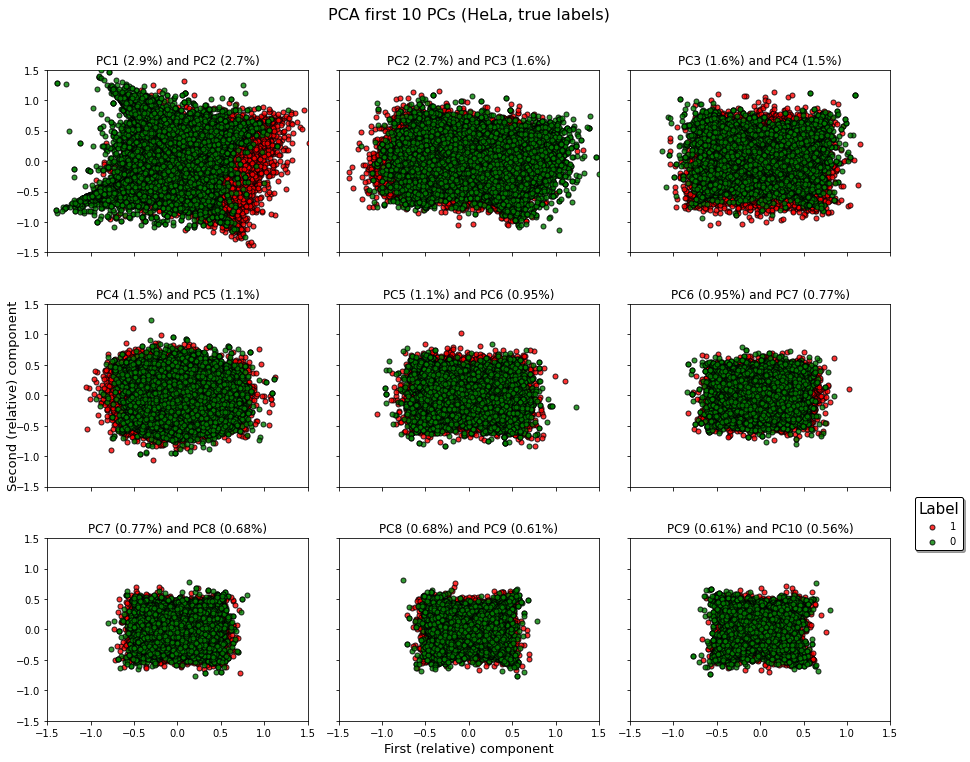

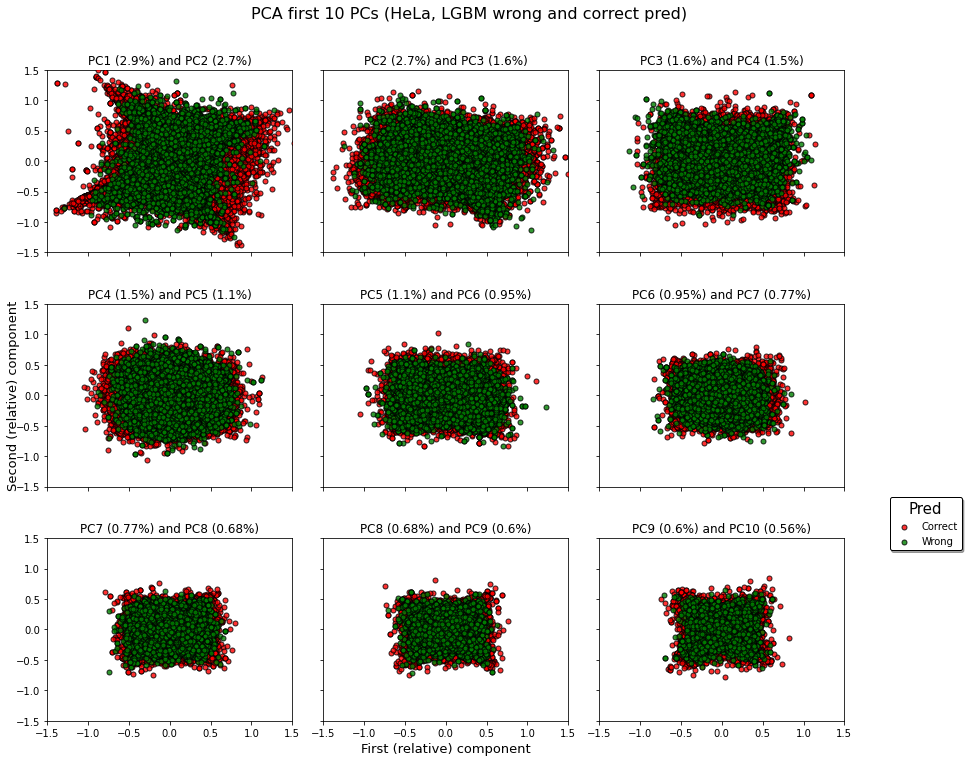

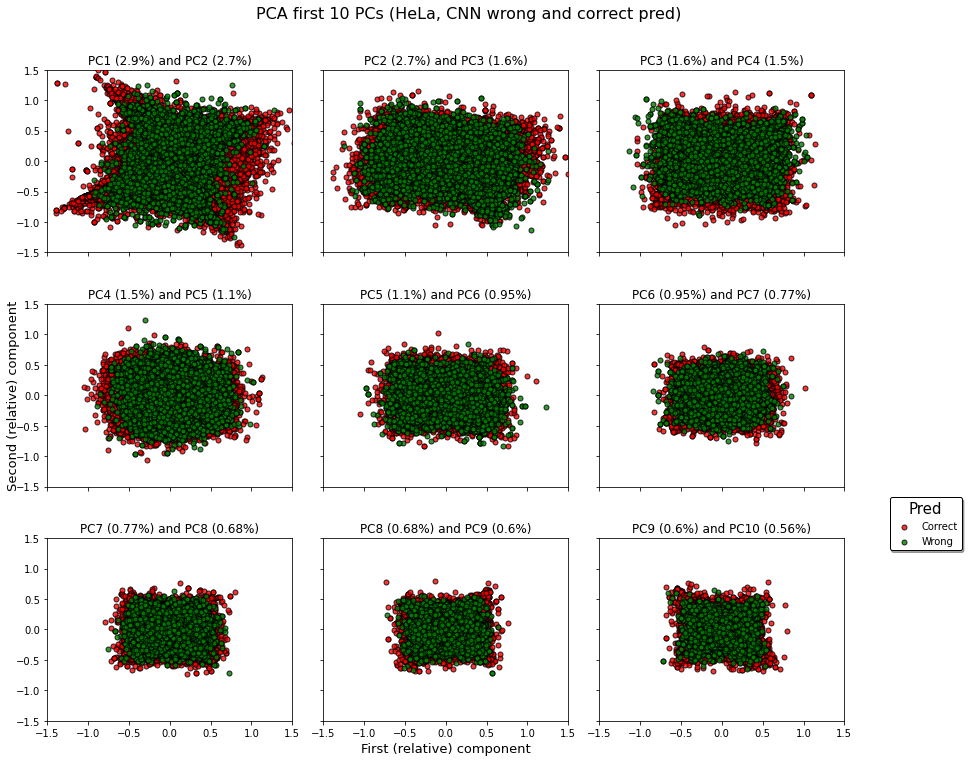

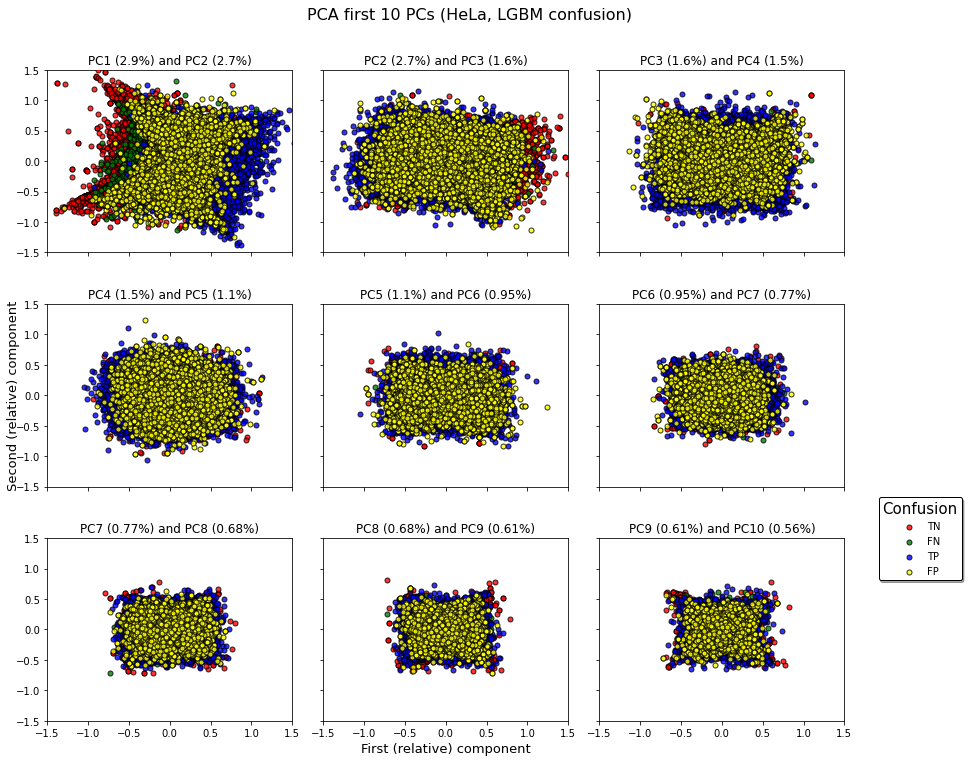

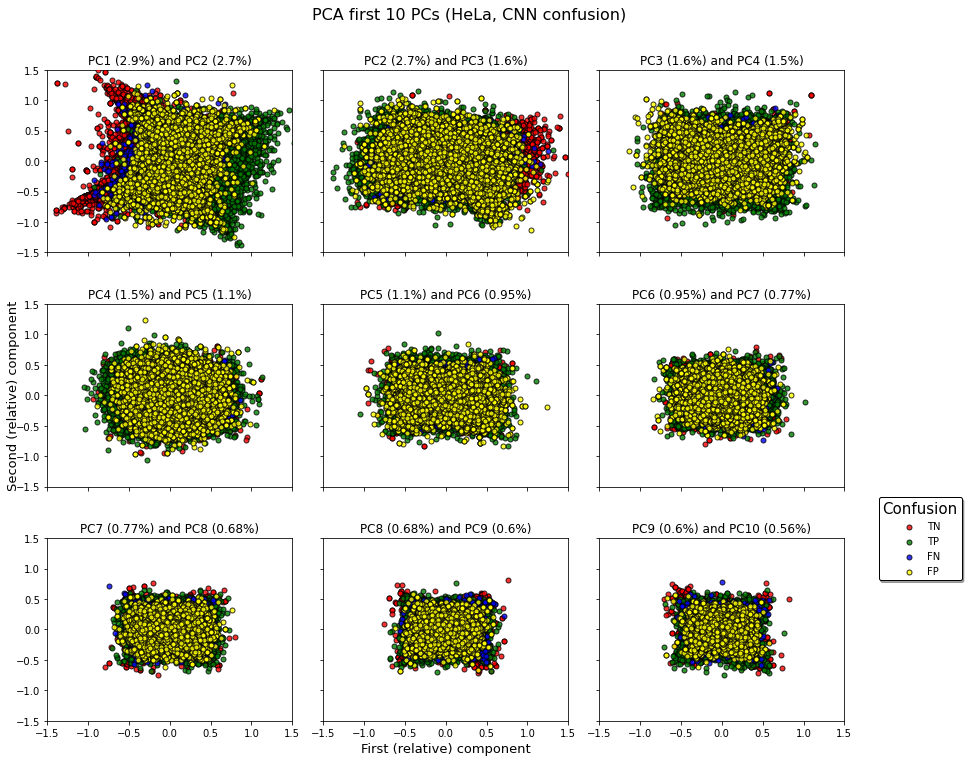

In [29]:
# PCA plot labels
multi_plot_pca(X_TEST, y_TEST, nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=[1, 0],
               legend_title="Label", filename="true_labels_rrp40_egfp", 
               title=" (HeLa, true labels)") 

# PCA plot correct and wrong predictions
multi_plot_pca(X_TEST, lgb_hela_both_output_confusion["prediction"], nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=["Correct", "Wrong"],
               legend_title="Pred", filename="lgb_correct_wrong_rrp40_egfp",
               title=" (HeLa, LGBM wrong and correct pred)",
               legend_anchor=(1.5, 1.25))
multi_plot_pca(X_TEST, cnn_hela_both_output_confusion["prediction"], nrows=3,
               figsize=(14,11), top=0.9, save=True, targets=["Correct", "Wrong"],
               legend_title="Pred", filename="cnn_correct_wrong_rrp40_egfp",
               title=" (HeLa, CNN wrong and correct pred)",
               legend_anchor=(1.5, 1.25))

# PCA plot confusion
multi_plot_pca(X_TEST, lgb_hela_both_output_confusion["confusion"], nrows=3,
               figsize=(14,11), top=0.9, save=True, 
               targets=lgb_hela_both_output_confusion["confusion"].unique(),
               legend_title="Confusion", filename="lgb_confusion_rrp40_egfp",
               title=" (HeLa, LGBM confusion)",
               legend_anchor=(1.5, 1.25)) 
multi_plot_pca(X_TEST, cnn_hela_both_output_confusion["confusion"], nrows=3,
               figsize=(14,11), top=0.9, save=True, 
               targets=cnn_hela_both_output_confusion["confusion"].unique(),
               legend_title="Confusion", filename="cnn_confusion_rrp40_egfp",
               title=" (HeLa, CNN confusion)",
               legend_anchor=(1.5, 1.25)) 

# Model interpretability

In [4]:
# Load models

lgbm_model = load_ml_model(scaler_model_name="LGBM_7folds", algo="lgbm")
cnn_model = load_ml_model(scaler_model_name="CNN_7folds", algo="cnn")
lgbm_model.params['objective'] = 'binary'

Loading LGBM model:
	/binf-isilon/alab/students/stefano/thesis_project/Models/pos_neg_shift_timepoint_0to2_all_merged_subtnorm/LGBM_7folds_cv_1_model_pos_neg_shift_timepoint_0to2_all_merged_subtnorm
Loading CNN model:
	/binf-isilon/alab/students/stefano/thesis_project/Models/pos_neg_shift_timepoint_0to2_all_merged_subtnorm/CNN_7folds_cv_1_model_pos_neg_shift_timepoint_0to2_all_merged_subtnorm


In [5]:
%time shap_values = shap.TreeExplainer(lgbm_model).shap_values(X_TRAIN[1:200000])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


CPU times: user 1d 11h 49min 39s, sys: 13.7 s, total: 1d 11h 49min 53s
Wall time: 45min 41s


### LGBM Importance

Text(0.5, 1.0, 'LightGBM feature importance gain')

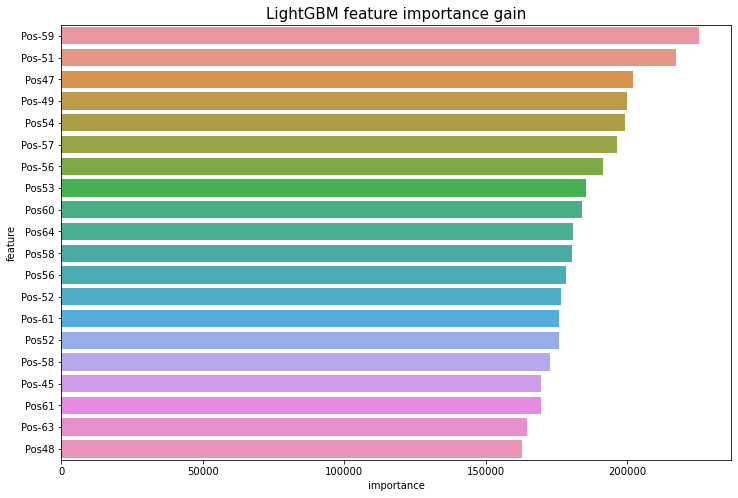

In [18]:
lgb_importance = pd.read_csv("/binf-isilon/alab/students/stefano/thesis_project/Data/ML_output/lgb_importance_pos_neg_shift_timepoint_0to2_all_merged_subtnorm.csv")

importance = pd.DataFrame()
importance["feature"] = list(X_TRAIN.columns)

importance["importance"] = lgbm_model.feature_importance(importance_type='gain')
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance.sort_values('importance', ascending=False).iloc[0:20])
plt.title("LightGBM feature importance gain", fontsize=15)

### SHAP Summary Plot

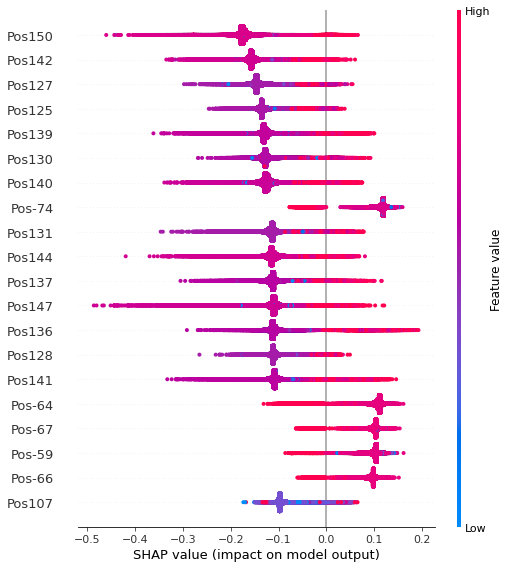

In [7]:
shap.summary_plot(shap_values[1], X_TRAIN[1:200000])

### SHAP Dependence Plots

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


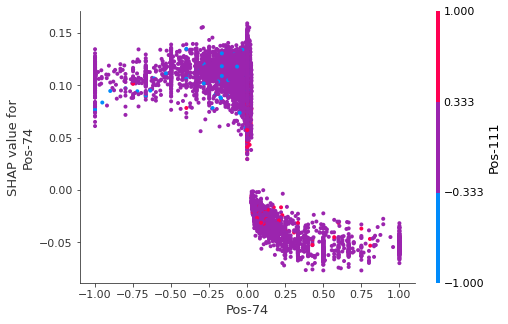

In [9]:
shap.dependence_plot("Pos-74", shap_values[1], X_TRAIN[1:200000])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


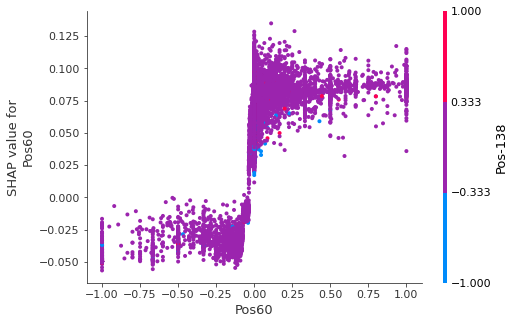

In [10]:
shap.dependence_plot("Pos60", shap_values[1], X_TRAIN[1:200000])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


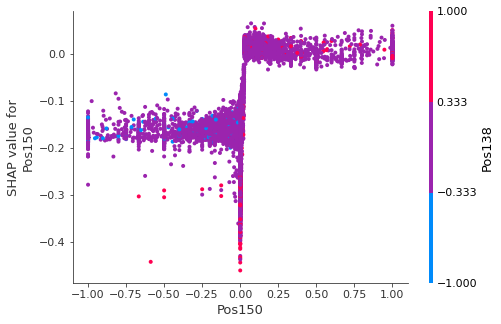

In [11]:
shap.dependence_plot("Pos150", shap_values[1], X_TRAIN[1:200000])

### SHAP Interaction Value

In [ ]:
%time shap_interaction_values = shap.TreeExplainer(lgbm_model).shap_interaction_values(X_TRAIN[1:20])

In [ ]:
shap.summary_plot(shap_interaction_values, X_TRAIN[1:20])

In [ ]:
tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()